In [1]:
import cv2
import os 
import torch
from torchvision.transforms import Resize, InterpolationMode
from data import Test_Preprocessor
from configs.config import * 
import glob
import numpy as np
from evaluate import Evaluator

In [2]:
model = torch.load("./models/resunet.pt", map_location='cpu')
evaluator = Evaluator(model, Test_Preprocessor((384, 384)), 'cuda')

In [3]:
paths = glob.glob("./data/Train_Images/*.jpg")

In [4]:
image_path_list = sorted(glob.glob(train_image_dir + "*" + img_suffix))
split_index = int(len(image_path_list) * train_ratio)
test_image_path_list = image_path_list[split_index:]
test_label_path_list = [os.path.join("./data/Annotations/", "label_" + os.path.basename(image_path).split(".")[0] + ".npz") for image_path in test_image_path_list]

print(len(test_image_path_list))

158


In [5]:
evaluator.evaluate(test_image_path_list, test_label_path_list, do_tta=False)

100%|██████████| 158/158 [00:14<00:00, 11.03it/s]


0.8468356507865689

In [6]:
print(evaluator.evaluate(test_image_path_list, test_label_path_list, do_tta=True, vote_mode='any'))
print(evaluator.evaluate(test_image_path_list, test_label_path_list, do_tta=True, vote_mode='soft'))

  1%|          | 1/158 [00:00<00:16,  9.41it/s]

0.833565526123194


100%|██████████| 158/158 [00:14<00:00, 10.72it/s]

0.8581861566422107


In [7]:
%rm -rf "./Public_Prediction/"
!mkdir "./Public_Prediction/"

In [8]:
paths = glob.glob("./data/Public_Image/*.jpg")
evaluator.test(paths, "./Public_Prediction/", mask_mode='color', do_tta=True, vote_mode='soft')

  1%|          | 1/131 [00:00<00:16,  8.08it/s]

Use (942, 1716) as output!


100%|██████████| 131/131 [00:13<00:00,  9.74it/s]


TypeError: Image data of dtype object cannot be converted to float

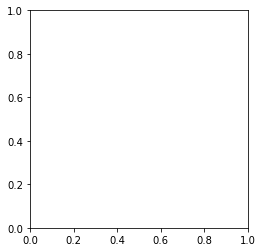

In [9]:
import matplotlib.pyplot as plt

plt.imshow(cv2.imread("./Public_Prediction/00000003.png"))

In [10]:
!zip -r "./Public_Prediction.zip" "./Public_Prediction/"

  adding: Public_Prediction/ (stored 0%)
  adding: Public_Prediction/Public_00000089.png (deflated 57%)
  adding: Public_Prediction/Public_00000031.png (deflated 79%)
  adding: Public_Prediction/Public_00000001.png (deflated 67%)
  adding: Public_Prediction/Public_00000099.png (deflated 35%)
  adding: Public_Prediction/Public_00000013.png (deflated 39%)
  adding: Public_Prediction/Public_00000041.png (deflated 75%)
  adding: Public_Prediction/Public_00000023.png (deflated 70%)
  adding: Public_Prediction/Public_00000119.png (deflated 50%)
  adding: Public_Prediction/Public_00000126.png (deflated 61%)
  adding: Public_Prediction/Public_00000022.png (deflated 69%)
  adding: Public_Prediction/Public_00000110.png (deflated 61%)
  adding: Public_Prediction/Public_00000121.png (deflated 51%)
  adding: Public_Prediction/Public_00000076.png (deflated 41%)
  adding: Public_Prediction/Public_00000127.png (deflated 45%)
  adding: Public_Prediction/Public_00000028.png (deflated 64%)
  adding: Publ